In [1]:
#Librerias que se utilizaran
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import duckdb
import glob
from sklearn.impute import KNNImputer
from sklearn.metrics.pairwise import euclidean_distances
import datetime
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error


# Librerias astrofisica
# =============================================================================
from astroquery.mast import Observations
import lightkurve as lk
from astropy.time import Time

con = duckdb.connect(database=':memory:')

In [2]:
curvas_finales = pd.read_csv("Curve_Statistics.csv")
curvas_finales

,ID,Long,Fecha_inicio,Fecha_final
0,9777251,54965.0,2009-12-19 21:32:21.493356,2013-05-11 12:01:38.246659
1,8415745,54964.0,2009-12-19 21:31:43.874328,2013-05-11 12:02:40.881334
2,9528420,64797.0,2009-05-13 00:17:28.661549,2013-05-11 12:01:50.050916
3,5009189,64794.0,2009-05-13 00:18:03.722051,2013-05-11 12:02:06.584268
4,9161118,54965.0,2009-12-19 21:32:13.781534,2013-05-11 12:01:40.483661
...,...,...,...,...
6709,9098810,65262.0,2009-05-02 00:55:45.028857,2013-05-11 12:01:34.618200
6710,11400356,63168.0,2009-06-20 06:21:26.732666,2013-05-11 12:01:58.138113
6711,9823457,64792.0,2009-05-13 00:17:48.102019,2013-05-11 12:02:14.674651
6712,7256914,64794.0,2009-05-13 00:18:42.455677,2013-05-11 12:03:03.683654


In [28]:
url_lc = "../Curvas_de_luz_arregladas/"

num_stars = curvas_finales.shape[0]
for i in range(num_stars):
    test_curv = pd.read_csv(url_lc+"LC_"+str(curvas_finales["ID"][10])+".csv")
    test_curv["time"] = pd.to_datetime(test_curv["time"])

    test_curv['time_diff'] = test_curv['time'].diff().dt.total_seconds()/(60)
    test_curv['flux_diff'] = test_curv['flux'].diff()
    test_curv['flux_diff_final'] = test_curv['flux_diff']/test_curv['time_diff']
    

IndentationError: expected an indented block (769318805.py, line 6)

In [25]:
# Calcular diferencias en tiempo (en segundos)

test_curv

,time,flux,flux_err,time_diff,flux_diff,flux_diff_final
0,2009-05-13 00:17:28.932429,-0.869818,4.970292,NaN,NaN,NaN
1,2009-05-13 00:46:54.464076,-0.861345,4.974615,29.425527,0.008473,0.000288
2,2009-05-13 01:16:19.987094,0.866623,4.973292,29.425384,1.727968,0.058724
3,2009-05-13 01:45:45.501451,-0.979437,4.973445,29.425239,-1.846061,-0.062737
4,2009-05-13 02:15:11.024459,-0.778733,4.979018,29.425383,0.200705,0.006821
...,...,...,...,...,...,...
64787,2013-05-11 10:04:18.204312,0.726120,4.906689,29.425225,-0.015309,-0.000520
64788,2013-05-11 10:33:43.735122,0.715149,4.905931,29.425514,-0.010971,-0.000373
64789,2013-05-11 11:03:09.257298,0.836853,4.908393,29.425370,0.121704,0.004136
64790,2013-05-11 11:32:34.770837,0.659579,4.877865,29.425226,-0.177274,-0.006025


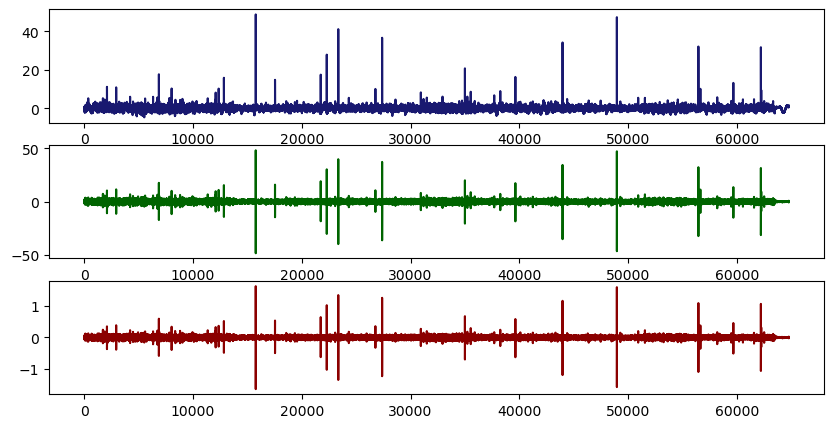

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(3,1,1)
plt.plot(test_curv['flux'], color='midnightblue')
plt.subplot(3,1,2)
plt.plot(test_curv['flux_diff'], color='darkgreen')
plt.subplot(3,1,3)
plt.plot(test_curv['flux_diff_final'], color='darkred')
plt.show()